# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

In [1]:
# Run this to load the MNIST dataset
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
)
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree,
)

train_img, train_labels = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(train_img[i].reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=train_labels[i])




ImportError: cannot import name 'multilabel_confusion_' from 'sklearn.metrics._classification' (C:\Users\Oscar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py)

#### Results 
The MNIST dataset is a very old dataset that contains 70,000 images of handwritten digits from 0 to 9. It is a reference dataset for machine learning and computer vision. We can visualise the first 20 digits of the dataset and print their corresponding labels. We can use these labels to use a supervised learning algorithm to predict the labels of the rest of the dataset. 


### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

In [ ]:


SEED = 42

train_img, test_img, train_labels, test_labels = train_test_split(
    train_img, train_labels,
    test_size=1/7.0,
    random_state=SEED,
)

I seperate the dataset into training and testing sets. I did 1/7 split for the training and testing sets because the dataset is 70000 images large. I used the SEED 42 to ensure reproducibility. This way we'll be able to fit our model on the training set and evaluate it on the testing set. 

In [ ]:
scaler = StandardScaler()

# we fit on training set only.
train_img_scaled = scaler.fit_transform(train_img)
test_img_scaled = scaler.transform(test_img)


I standardised the data using the StandardScaler from the sklearn library. This is important because the Logistic Regression algorithm is sensitive to the scale of the features. I fit the training set only because for instance we don't want to introduce any bias into the testing set.

In [ ]:


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l2'],  
    'max_iter': [10,100, 1000]
}

print("Performing grid search...")
grid_search = GridSearchCV(
    LogisticRegression(random_state=SEED,solver="lbfgs", multi_class="auto"),
    param_grid,
    cv=5,
)

grid_search.fit(train_img_scaled, train_labels)

best_model = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)

y_pred = best_model.predict(test_img_scaled)
accuracy = accuracy_score(test_labels, y_pred)
print("\nTest accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

print("score : " + str(best_model.score(test_img_scaled, test_labels)))




#### Results

##### Context
First things first, this code takes a long time to run (several hours). I had to stop the code because it was taking too long to run. This has been the main issue with this part of the coursework. I made some personal research on Logistic Regression and found out that it is not the best algorithm for that dataset. 
I used "lbfgs" solver because apparently the default solver is insanly slow. Because we perform hyperparameter tuning, we need to optimize the parameters we are using to actually get a result. 

##### Interpretation 



In [ ]:


def plot_classification_vectors(model):
    plt.figure(figsize=(15, 8))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        weights = model.coef_[i].reshape(28, 28)
        plt.imshow(weights, cmap='seismic', interpolation='nearest')
        plt.title(f'Digit {i}')
        plt.colorbar()
    plt.tight_layout()
    plt.show()
    plt.close()

plot_classification_vectors(best_model)



#### Interpretation

TODO


#### Sources


user a scaler: 
https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_to_Speed-up_Machine_Learning_Algorithms.ipynb 

Documentation and resources on the topic:
https://scikit-learn.org/stable/modules/preprocessing.html
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

In [ ]:
# https://builtin.com/machine-learning/pca-in-python
from sklearn.decomposition import PCA

# take the minimum of components such as 95% of the variance is retained
pca = PCA(0.95)

pca.fit(train_img)
print("Original scale:", train_img.shape)
print("Number of components:", pca.n_components_)

train_img_pca = pca.transform(train_img)
test_img_pca = pca.transform(test_img)



## Interpretation

We come from a 784-dimensional space to a 330-dimensional space. I choose 0.95 as the threshold because it is a common threshold to use with PCA. We can already that that we need 330 components to explain 95% of the variance but for the purpose of this exercise we will use 80% of the variance.

In [ ]:


def plot_cum_variance_explained(pca):
    nb_comp = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.8)[0][0]
    print("Number of components for 80% variance:", nb_comp)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.axvline(x=nb_comp, color='r', linestyle='--')
    plt.axhline(y=0.8, color='g', linestyle='--')
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.savefig('pca_variance_explained.png')
    plt.show()
    plt.close()


def plot_var_over_comp(pca):
    plt.figure(figsize=(10, 8))
    plt.plot(pca.explained_variance_ratio_, marker='o')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio by Principal Component')
    plt.grid()
    # plt.savefig('pca_variance_ratio.png')
    plt.show()
    plt.close()

  



plot_cum_variance_explained(pca)
plot_var_over_comp(pca)



## Interpretation 
We can see on the first plot that we need 147 components to explain 80% of the variance. PCA did a good job of dimentional reduction on this dataset. On the second plot we can see the curve of the variance explained for each principal components. I understand why the author of the exercise choosed 80% as the threshold. We can see that the curve is almost linear after 147 components.

In [ ]:
def plot_loadings(pca):
    fig, ax = plt.subplots(4, 5, figsize=(15, 8))
    for i, axi in enumerate(ax.flat):
        component = pca.components_[i].reshape(28, 28)
        vmax = np.abs(component).max()
        axi.imshow(component, cmap='RdBu_r', vmin=-vmax, vmax=vmax)
        axi.set_title(f'PC {i+1}')
        axi.axis('off')
    plt.suptitle('First 20 Principal Components Loadings', y=1.02, size=14)
    plt.tight_layout()
    # plt.savefig('pca_loadings.png')
    plt.show()
    plt.close()

plot_loadings(pca)


The plot  shows the loadings of the first 20 principal components. Each principal component is represented as 
a 28x28 image, where each pixel corresponds to a feature in the original dataset. The color of each pixel indicates
 the weight of the corresponding feature in the principal component. Blue pixels represent negative weights, red pixels 
represent positive weights, and white pixels represent zero weights. The intensity of the color indicates the magnitude 
of the weight. By examining the loadings of the principal components, we can gain insights into the underlying structure
 of the data and identify patterns that are important for explaining the variance in the dataset.

Source of help: https://ryanwingate.com/intro-to-machine-learning/unsupervised/pca-on-mnist/



In [ ]:

def plot_P1_over_P2(train_img_pca):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=train_img_pca[:, 0], y=train_img_pca[:, 1], hue=train_labels, palette='tab10')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D Scatter Plot of Principal Components')
    plt.legend(title='Classes')
    # plt.savefig('pca_scatter_classes_visu.png')
    plt.show()

plot_P1_over_P2( train_img_pca)



#### Interpretation 


In [ ]:

def plot_digits_from_pca(pca, data):
    fig, ax = plt.subplots(4, 5, figsize=(15, 8))
    for i, axi in enumerate(ax.flat):
        digit = pca.inverse_transform(data[i]).reshape(28, 28)
        axi.imshow(digit, cmap='gray')
        axi.set(xticks=[], yticks=[])
    plt.suptitle('First 20 Digits from PCA', y=1.02, size=14)
    plt.tight_layout()
    # plt.savefig('pca_digits.png')
    plt.show()
    plt.close()

plot_digits_from_pca(pca, train_img_pca)



#### Results 

Using the inverse_transform feature of PCA allowed use to get pretty good results. We can see that the digits are not as clear as the original images but we can still see the digits. What we could do in extension would be to train a model on the PCA transformed data and see how it performs, make a comparison with the original data.

### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
        
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def add_noise(data, noise_level=0.1):
    return data + noise_level * np.random.normal(loc=0, scale=1, size=data.shape)

noised_train_img = add_noise(train_img, noise_level=0.4)
noised_test_img = add_noise(test_img, noise_level=0.4)

noised_train_img = np.clip(noised_train_img, 0, 1)
noised_test_img = np.clip(noised_test_img, 0, 1)

def plot_20_digits(data, title):
    fig, ax = plt.subplots(4, 5, figsize=(15, 8))
    for i, axi in enumerate(ax.flat):
        axi.imshow(data[i].reshape(28, 28), cmap='gray')
        axi.set(xticks=[], yticks=[])
    plt.suptitle(title, y=1.02, size=14)
    plt.tight_layout()
    plt.show()
    plt.close()

plot_20_digits(train_img, 'Original scaled digits')
plot_20_digits(noised_train_img, 'Noised digits')



#### Interpretation

I've added random noise from normal distribution with mean = 0 and std =1

https://youtu.be/Sm54KXD-L1k

2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.


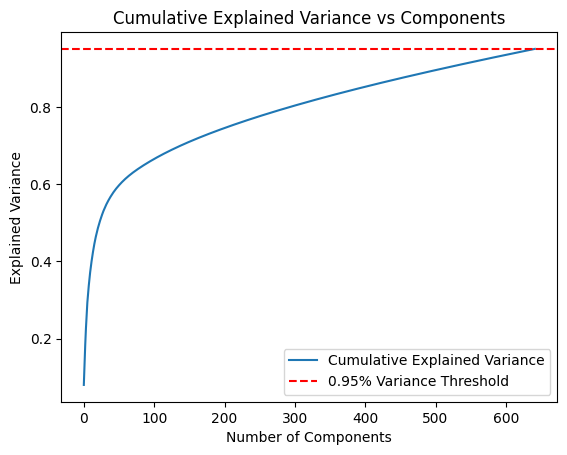

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def add_noise(data, noise_level=0.1):
    return data + noise_level * np.random.normal(loc=0, scale=1, size=data.shape)

def plot_20_digits(data, title):
    fig, ax = plt.subplots(4, 5, figsize=(15, 8))
    for i, axi in enumerate(ax.flat):
        axi.imshow(data[i].reshape(28, 28), cmap='gray')
        axi.set(xticks=[], yticks=[])
    plt.suptitle(title, y=1.02, size=14)
    plt.tight_layout()
    plt.show()
    plt.close()

noise_level = 0.3
noised_train_img = add_noise(train_img, noise_level=noise_level)
noised_test_img = add_noise(test_img, noise_level=noise_level)

noised_train_img = np.clip(noised_train_img, 0, 1)
noised_test_img = np.clip(noised_test_img, 0, 1)


sufficient_variance = 0.95   

pca = PCA(sufficient_variance)
pca.fit(noised_train_img)

cumsum = np.cumsum(pca.explained_variance_ratio_)


plt.plot(cumsum, label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Cumulative Explained Variance vs Components')
plt.axhline(y=sufficient_variance, color='r', linestyle='--', label=f'{sufficient_variance}% Variance Threshold')
plt.legend()
plt.show()


noised_train_img_pca = pca.transform(noised_train_img)
denoised_train_img = pca.inverse_transform(noised_train_img_pca)
denoised_test_img = pca.inverse_transform(pca.transform(noised_test_img))





#### Results 

I tried several parameter for pca such as .8, .9, .95, .99. I found out that .95 was the best parameter to use. We can see that the digits are still visible after the denoising process. I used .3 as a paramater to add noise to the dataset. I think it was a good choice because the signal is not destroyed but the noise is still visible. I also choosed to clip the values of the dataset between 0 and 1. This is a common practice in image processing that I found after my reseach on the topic, instead of using a scaler. 

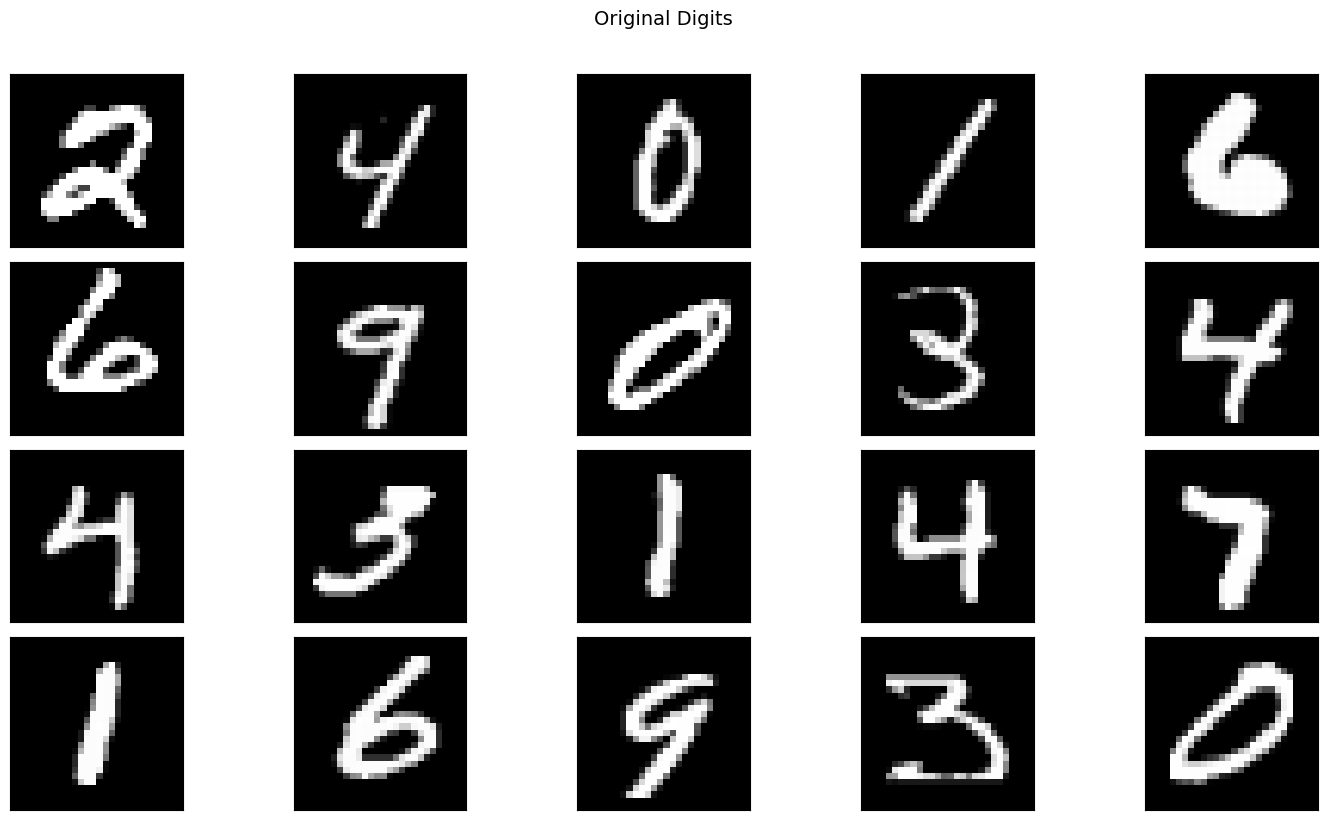

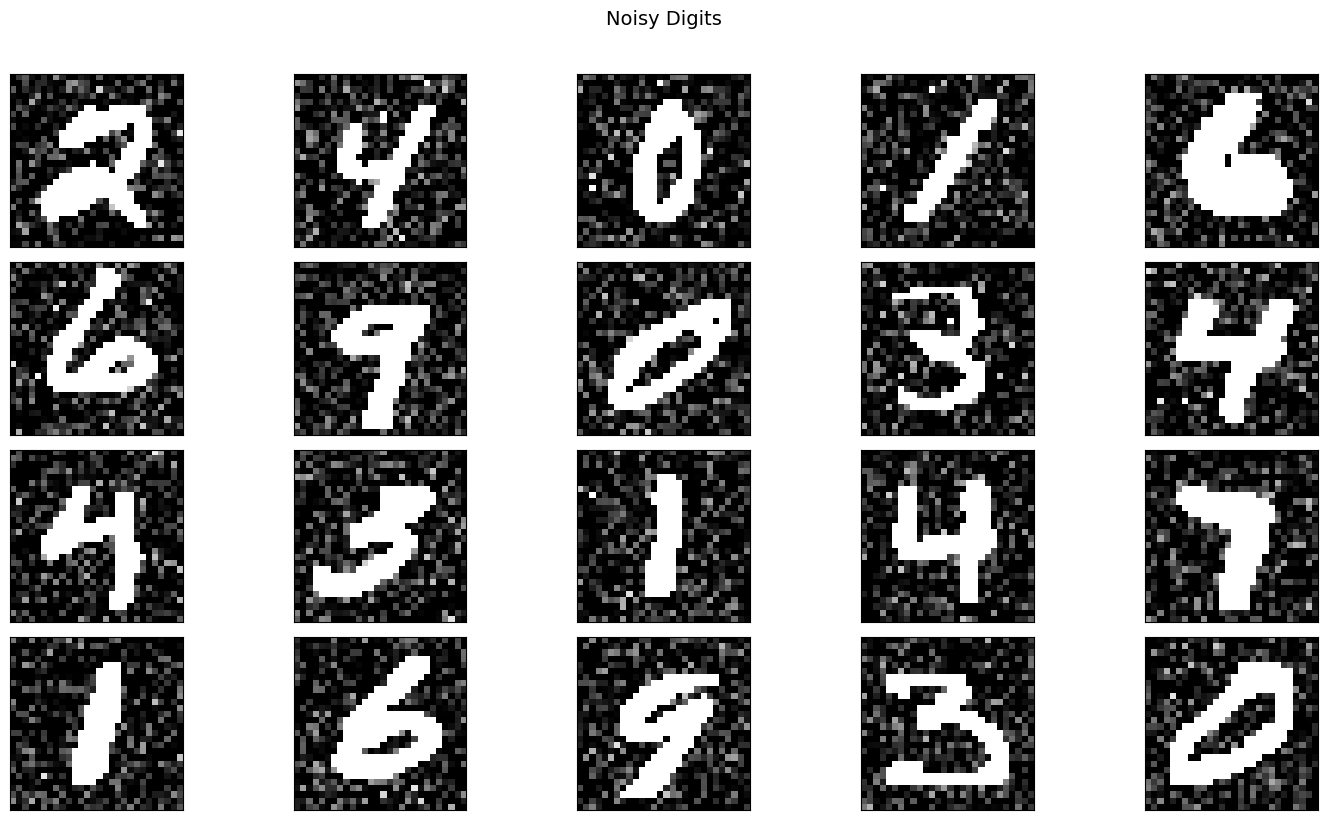

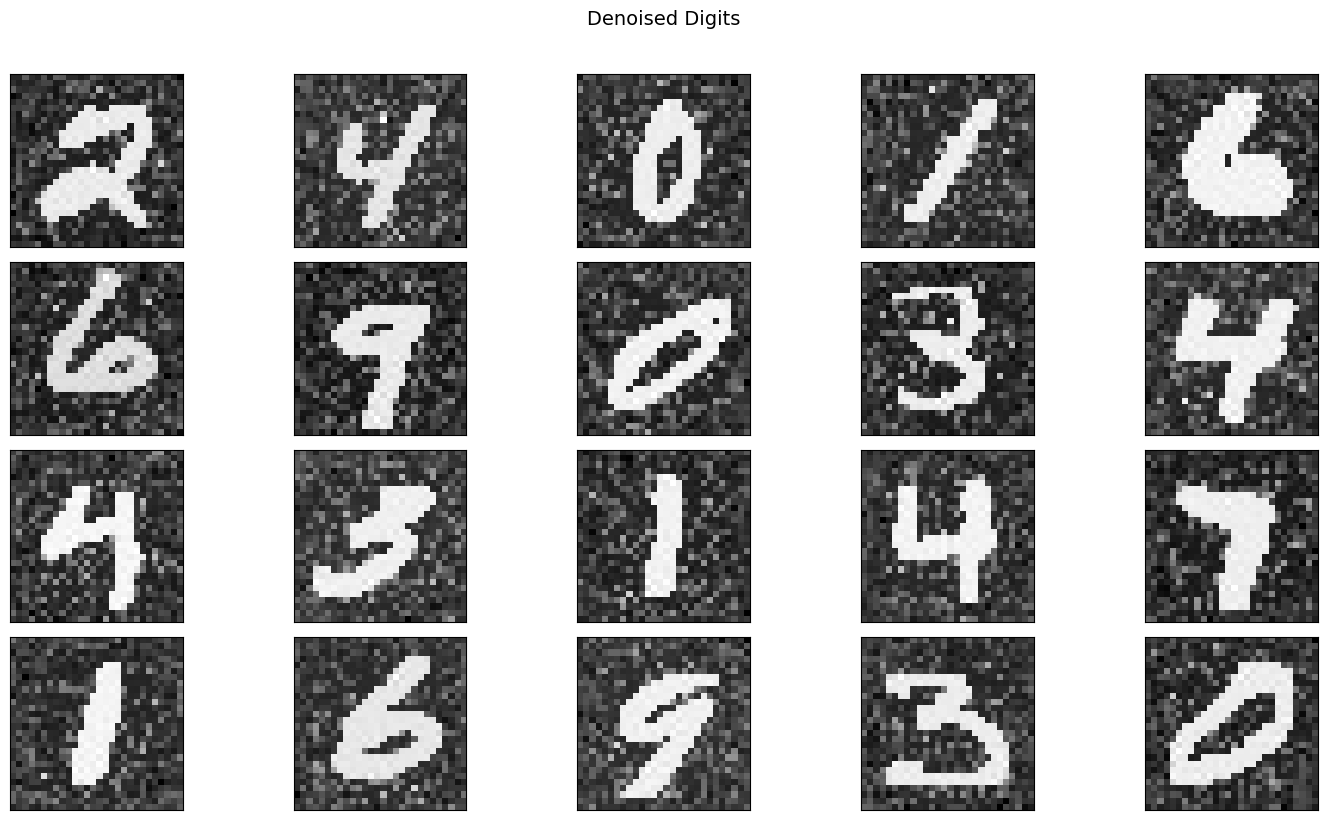

In [73]:

plot_20_digits(train_img, 'Original Digits')
plot_20_digits(noised_train_img, 'Noisy Digits')
plot_20_digits(denoised_train_img, 'Denoised Digits')

#### Interpretation 

We can effectively see the difference between the original and the noised data. We can still recognize the figure. Moreover, we can see that the denoised data is quite similar to the noised data. I found it quite challenging to improve that, even after trying different twicking. However, as we will see in the next part, It still got better results than the noised data. 

In [70]:

from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)

rf_classifier.fit(train_img, train_labels)
y_pred_original = rf_classifier.predict(test_img)
accuracy = accuracy_score(test_labels, y_pred)

y_pred_noised = rf_classifier.predict(noised_test_img)
accuracy_noised = accuracy_score(test_labels, y_pred_noised)

y_pred_denoised = rf_classifier.predict(denoised_test_img)
accuracy_denoised = accuracy_score(test_labels, y_pred_denoised)


print(f"Original test accuracy: {accuracy:.4f}")
print(f"Noised test accuracy: {accuracy_noised:.4f}")
print(f"Denoised test accuracy: {accuracy_denoised:.4f}")




Original test accuracy: 0.9674
Noised test accuracy: 0.3501
Denoised test accuracy: 0.3959


#### Results

**Original test accuracy:** `0.9674`  
**Noised test accuracy:** `0.3501`  
**Denoised test accuracy:** `0.3959`


I got a slighly better result with the denoised data than with the noised data. The digits are clearer and we can see that the noise has been partially removed. I found this exercise really interesting because it shows how we can use PCA for different tasks. I choosed RandomForest as a classifier based on my own research. other people used it with the same parameter and got good results with the same dataset so I thought it was a good idea to use it. 

#### Sources : 

https://stats.stackexchange.com/questions/247260/principal-component-analysis-eliminate-noise-in-the-data
https://benmilanko.com/projects/mnist_with_pca/
https://www.analyticsvidhya.com/blog/2021/11/pca-on-mnist-dataset/